## Growth Curve Model (GCM)

### 1. Introduction

The last family of models used for the measurement of change that we will cover is Growth Curve Models (GCMs). These models are ideal for research scenarios with **several** repeated measurements over time. In other words, these models are a good choice when working with more intense longitudinal data. The reason for this is that we will not be only looking at differences between 2 time-points, but at a trajectory of change over time. 

In [1]:
#######################################################
## Specify R environment for rpy2
#import os
#os.environ['R_HOME'] = r'C:/Program Files/R/R-4.4.3'  # Replace with your R path
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr
from rpy2.robjects import Formula
import contextlib
# Ipython extension for plotting
%load_ext rpy2.ipython
########################################################

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image, display

c:\Users\danie\.conda\envs\psy112ER\Lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


### 2. Data Exploration

The `anx` data frame contains results from an anxiety test applied to 485 children at 4 different time-points (t1, t2, t3, t4). Additionally, the data frame contains binary-coded information about the parents' employment status (0 = at least one parent is unemployed, 1 = employed). This variable was considered given the growing evidence that early anxiety can be elicited by whether or not the parents have a job. Feel free to use the code chunks to explore the data frames and gain a good overview.

In [2]:
# Read the CSV file using a relative path
anx = pd.read_csv("../LSCM_and_GCM/Datasets/anx.csv")

# Display the first few rows of the dataframe
print(anx.head())

   id  ES        t1        t2        t3        t4
0   1   0  1.714286  1.500000  1.714286  1.928571
1   2   0  1.642857  1.642857  1.214286  1.928571
2   3   1  1.642857  2.000000  1.928571  1.857143
3   4   0  1.428571  1.857143  1.928571  1.857143
4   5   1  1.214286  1.571429  1.428571  1.785714


### 3. Linear GCM: Model Specification and Fit

Linear GCM models assume that change over time is linear. Although the `sem()` function could be used, it is better to employ the `growth()` function of `lavaan` because it includes special default settings for these models. 

In order to define a GCM, you should keep in mind that 2 latent variables representing the intercept and the slope need to be specified. All measured variables (time-points) in the data file should be regressed onto these two factors, such that their loadings are differently constrained: Whereas all factor loadings on the latent intercept are fixed to 1, the factor loadings on the latent slope factor are fixed as linearly increasing units (0, 1, 2, ..., t - depending on the number of measurement time-points). The next code declares, fits and plots a linear GCM:

R[write to console]: This is lavaan 0.6-19
lavaan is FREE software! Please report any bugs.



lavaan 0.6-19 ended normally after 45 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                         9

  Number of observations                           485

Model Test User Model:
                                                      
  Test statistic                                27.288
  Degrees of freedom                                 5
  P-value (Chi-square)                           0.000

Model Test Baseline Model:

  Test statistic                              1182.102
  Degrees of freedom                                 6
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.981
  Tucker-Lewis Index (TLI)                       0.977

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)               -567.499
  Loglikelihood unrestricted model (H1)       -5

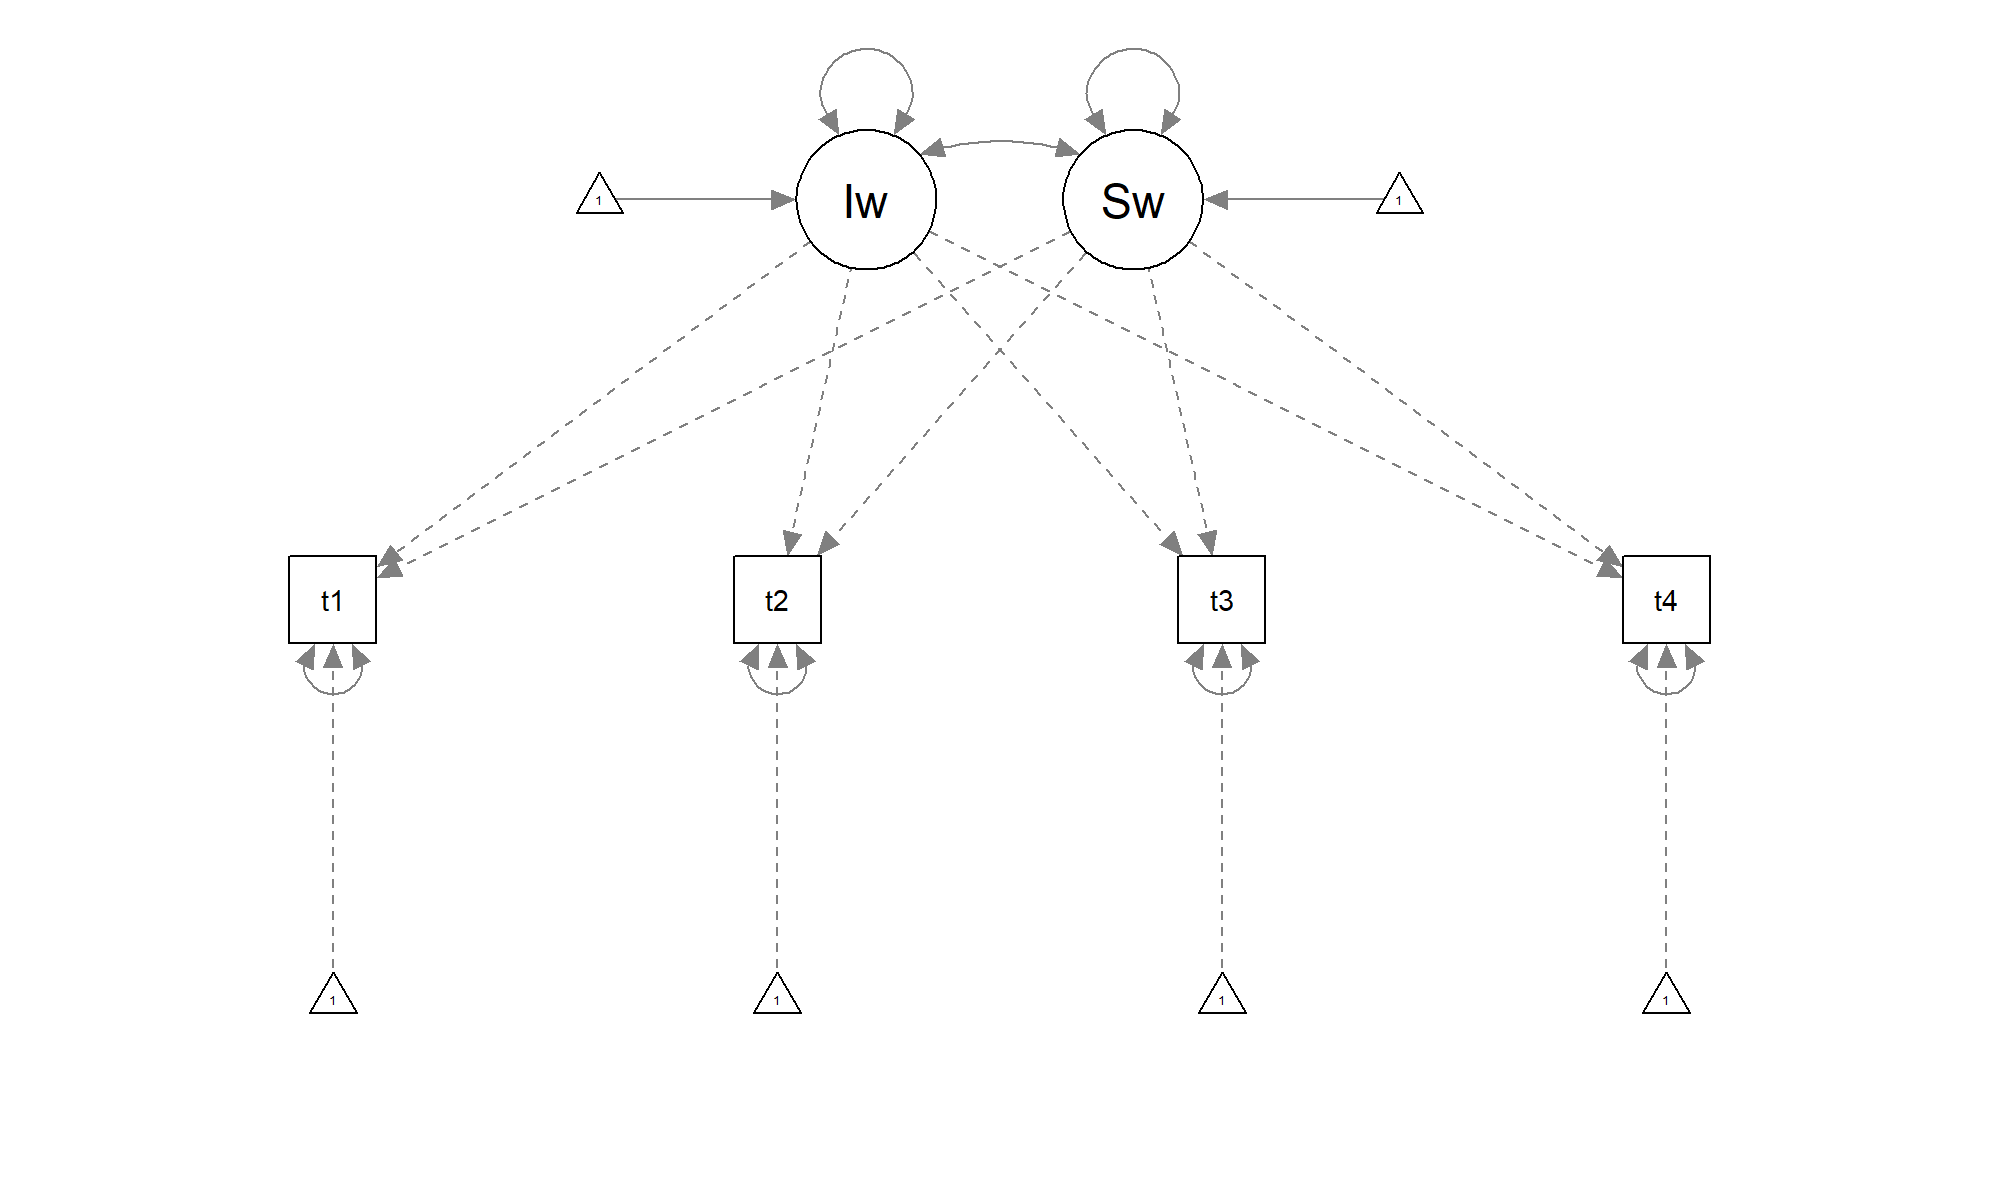

In [3]:
# Activate pandas2ri for automatic conversion
pandas2ri.activate()

# Import the lavaan package in R
ro.r('library(lavaan)')

# Import semPlot for plotting SEM paths
ro.r('library(semPlot)')

# Load the dataset into R
ro.globalenv['anx'] = pandas2ri.py2rpy(anx)

# Define the SEM model
ro.r('''
GCM1 <- '

#Intercept factor loadings are fixed to 1
Iw =~ 1*t1 + 1*t2 + 1*t3 + 1*t4

#Slope factor loadings are increasingly fixed
Sw =~ 0*t1 + 1*t2 + 2*t3 + 3*t4
'
     
''')

# Fit the SEM model
ro.r('fit4 <- growth(GCM1, data=anx)')

# Display the summary of the SEM model
summary = ro.r('summary(fit4, fit.measures=TRUE, standardized=TRUE)')
print(summary)

# Save the SEM path diagram as a PNG file
ro.r('''
png("../LSCM_and_GCM/Datasets/semPath2.png", width = 2000, height = 1200, res = 150)
semPaths(fit4)
dev.off()
''')

# Display the saved SEM path diagram in Jupyter Notebook
display(Image(filename="../LSCM_and_GCM/Datasets/semPath2.png"))

### 4. Output Interpretation

* The intercept estimate of the specified latent intercept factor (0.698) indicates the sample average anxiety score at time 1 (t1).

* The intercept estimate of the specified latent slope factor (-0.062) indicates the growth from t1 to t2. Children with positive values on this factor increase their anxiety level, whereas children with negative latent slope factor values are characterized by a decrease on anxiety. On average, there is a decrease (indicated by the negative sign of the average slope factor -0.062). Thus, since factor loadings on the slope factor increase in a linear fashion, this value represents the change over time. 

* The covariance between the latent intercept and slope factors represent the relationship between the initial values and the degree of change in anxiety along the repeated measures. As such, a positive covariance means that children with higher initial values also exhibit stronger linear growths in anxiety. In our case, the significant negative correlation (-0,011, p < 0.001) tells us the opposite: those with lower initial values of anxiety exhibit stronger linear growths in anxiety.

* Lastly, the variances of the latent intercept (0.151) and slope (0.007) factors inform us about the magnitude of individual differences in initial values and the linear growth. In these models, intercept and slopes are treated as random effects, meaning that they take different values for different individuals. These are crucial estimates which help us to understand change from the viewpoint of individual differences. 

### 5. Non-linear GCM: Model Specification and Fit

The essential difference between linear and non-linear GCMs is that, whereas the former assumes a linear growth, the latter allows us to assess different (non-linear) growth patterns, such as a quadratic shape or a sudden growth after an intervention. An exploratory non-linear GCM is defined by allowing intermediate loadings on the latent slope factor to be freely estimated: 

lavaan 0.6-19 ended normally after 54 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        11

  Number of observations                           485

Model Test User Model:
                                                      
  Test statistic                                12.846
  Degrees of freedom                                 3
  P-value (Chi-square)                           0.005

Model Test Baseline Model:

  Test statistic                              1182.102
  Degrees of freedom                                 6
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.992
  Tucker-Lewis Index (TLI)                       0.983

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)               -560.278
  Loglikelihood unrestricted model (H1)       -5

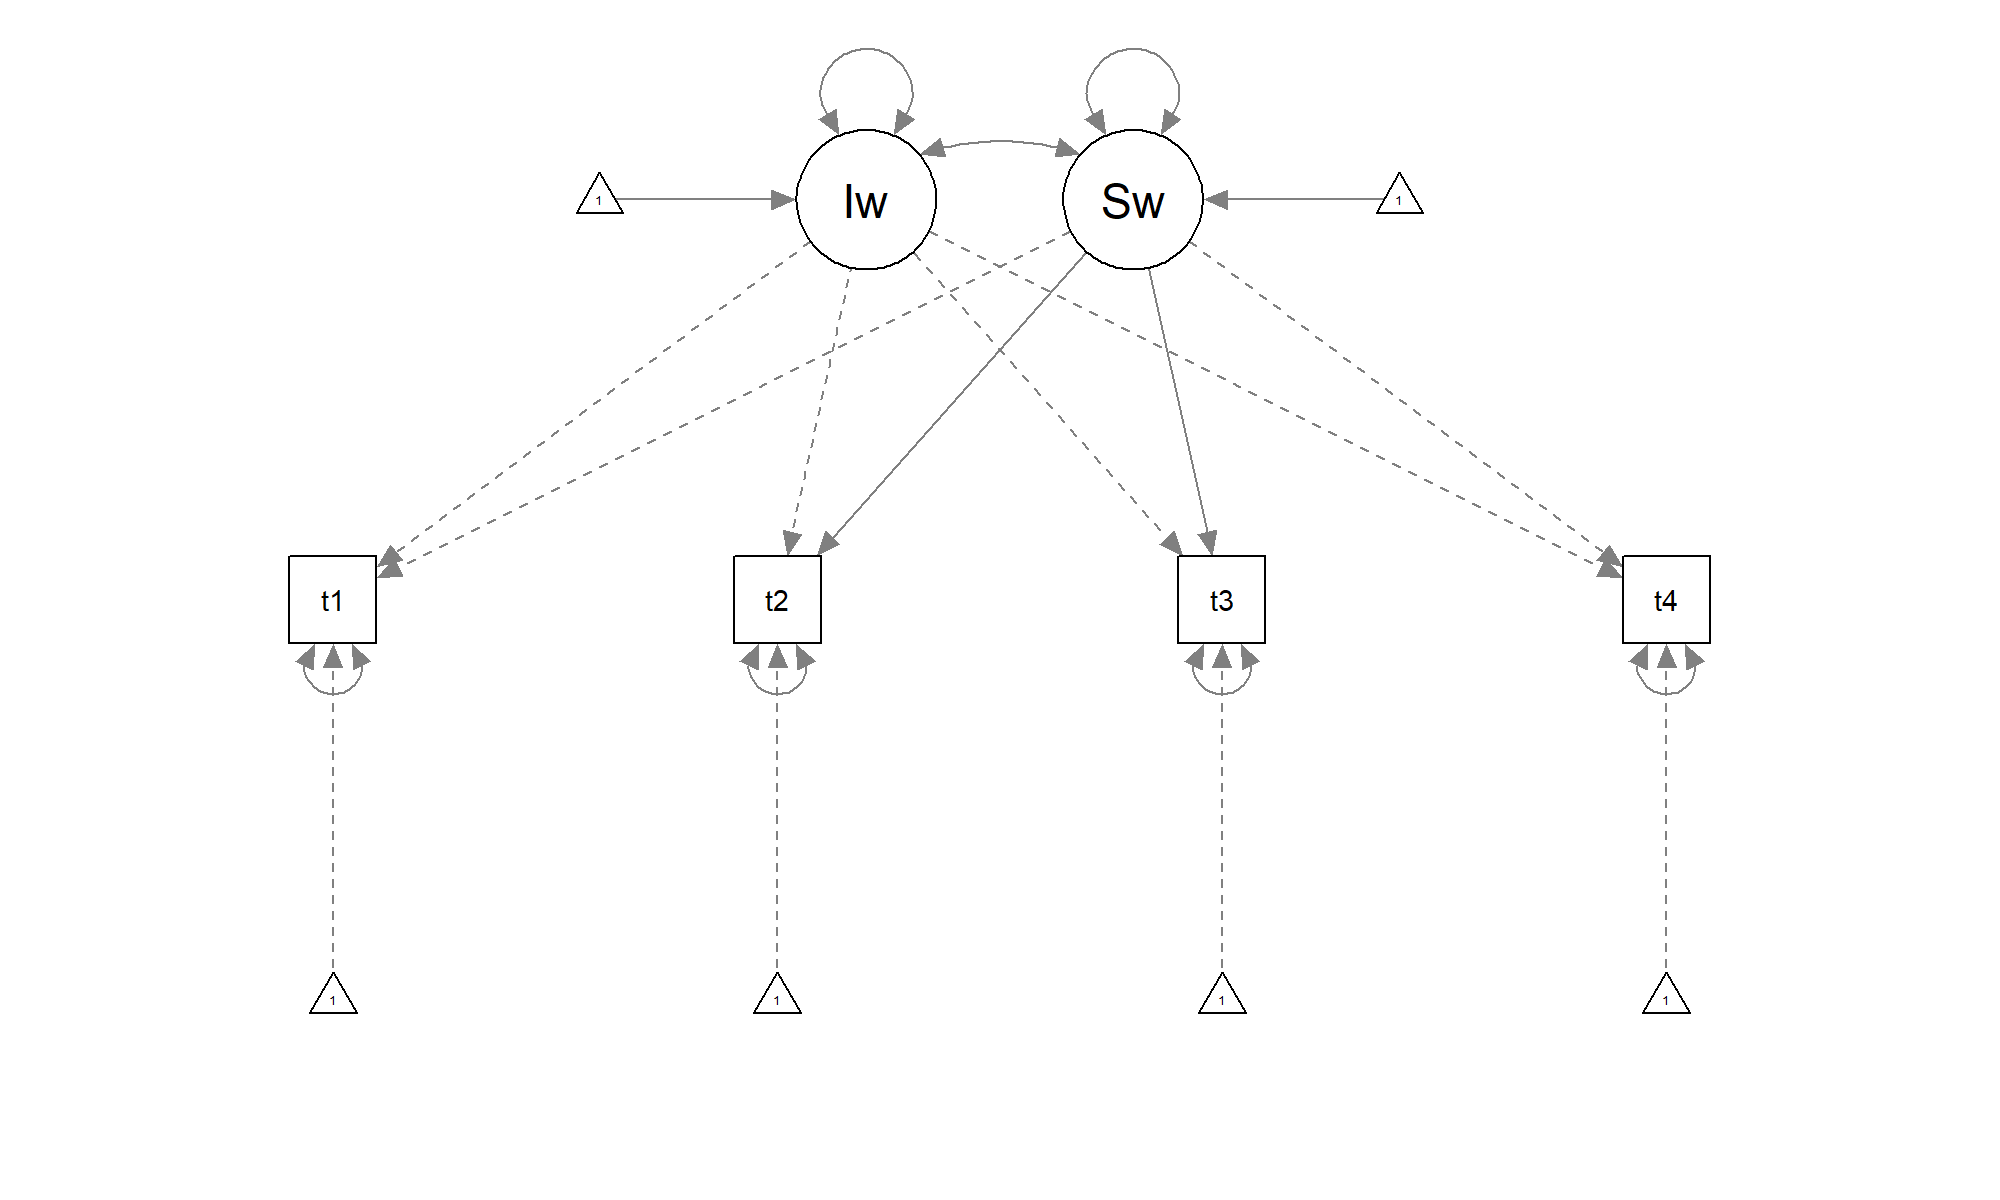

In [4]:
# Activate pandas2ri for automatic conversion
pandas2ri.activate()

# Import the lavaan package in R
ro.r('library(lavaan)')

# Import semPlot for plotting SEM paths
ro.r('library(semPlot)')

# Load the dataset into R
ro.globalenv['anx'] = pandas2ri.py2rpy(anx)

# Define the SEM model
ro.r('''
GCM2 <-  '
#Intercept fixed to 1
Iw =~ 1*t1 + 1*t2 + 1*t3 + 1*t4

#Intermediate factor loadings are freely estimated
Sw =~ 0*t1 + NA*t2 + NA*t3 + 3*t4
'
     
''')

# Fit the SEM model
ro.r('fit5 <- growth(GCM2, data=anx)')

# Display the summary of the SEM model
summary = ro.r('summary(fit5, fit.measures=TRUE, standardized=TRUE)')
print(summary)

# Save the SEM path diagram as a PNG file
ro.r('''
png("../LSCM_and_GCM/Datasets/semPath3.png", width = 2000, height = 1200, res = 150)
semPaths(fit5)
dev.off()
''')

# Display the saved SEM path diagram in Jupyter Notebook
display(Image(filename="../LSCM_and_GCM/Datasets/semPath3.png"))

### 6. Output Interpretation

The only difference in comparison to the output of the previous model is that now the growth over time is not linear. This means that changes from time 1 (t1) to time 2 (t2) is not necessarily the same as between time 2 (t2) and time 3 (t3) and so on. This is represented by the differences between the factor loading values of manifest variables t1, t2, t3, and t4 (0.000, 1.712, 2.441, 3.000) on the latent slope factor. 


### 7. Exercise 1

Please now fit the dataset on second order quadratic GCM model and interpret the intercept values.


R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: lavaan->lav_object_post_check():  
   covariance matrix of latent variables is not positive definite ; use 
   lavInspect(fit, "cov.lv") to investigate. 



lavaan 0.6-19 ended normally after 58 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        13

  Number of observations                           485

Model Test User Model:
                                                      
  Test statistic                                 1.148
  Degrees of freedom                                 1
  P-value (Chi-square)                           0.284

Model Test Baseline Model:

  Test statistic                              1182.102
  Degrees of freedom                                 6
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    1.000
  Tucker-Lewis Index (TLI)                       0.999

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)               -554.429
  Loglikelihood unrestricted model (H1)       -5

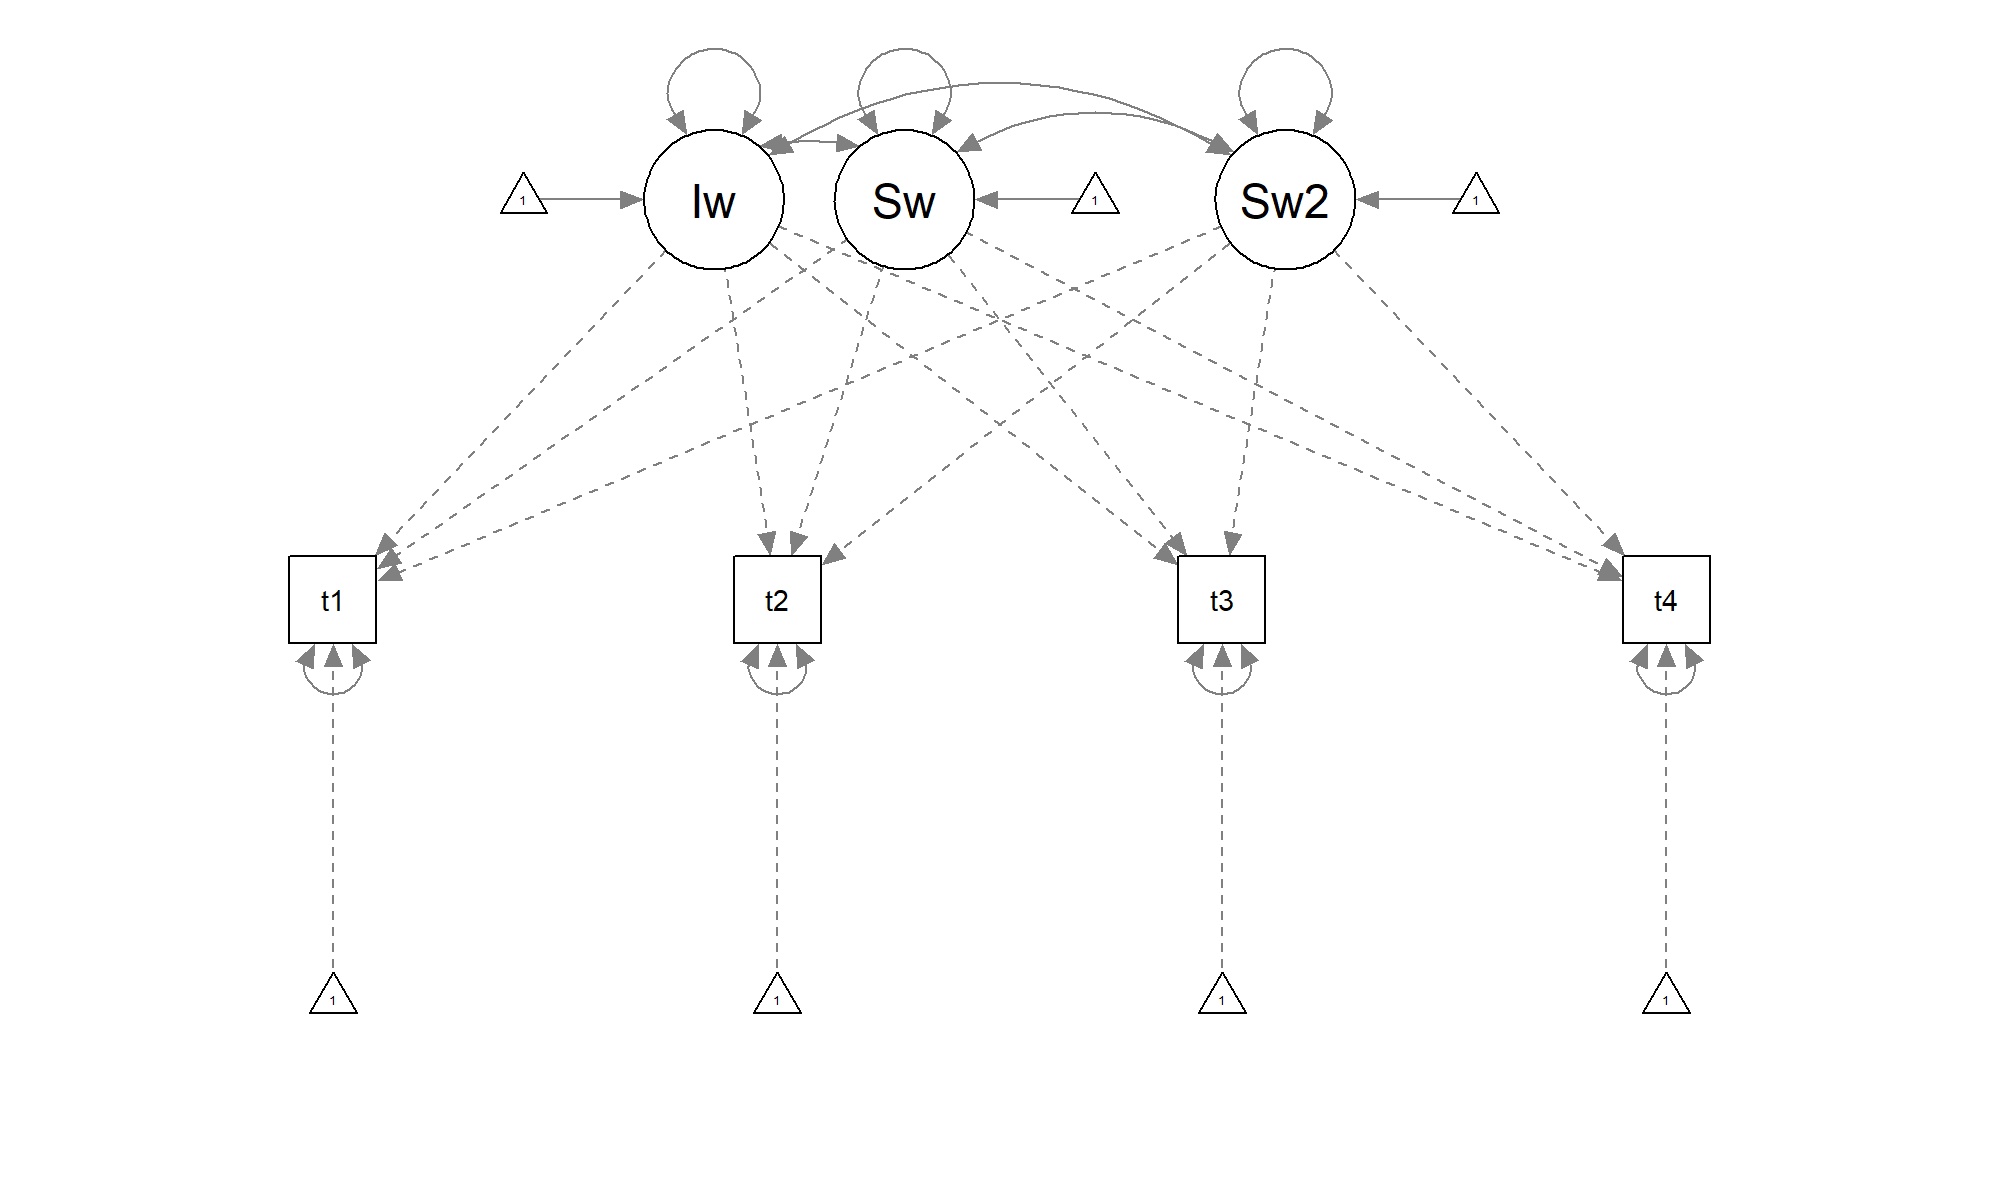

In [7]:
# Activate pandas2ri for automatic conversion
pandas2ri.activate()

# Import the lavaan package in R
ro.r('library(lavaan)')

# Import semPlot for plotting SEM paths
ro.r('library(semPlot)')

# Load the dataset into R
ro.globalenv['anx'] = pandas2ri.py2rpy(anx)

# Define the SEM model
ro.r('''
GCM3 <-  '
#Intercept fixed to 1
Iw =~ 1*t1 + 1*t2 + 1*t3 + 1*t4

#Slope linear
Sw =~ 0*t1 + 1*t2 + 2*t3 + 3*t4
     
# Second-order factor model
Sw2 =~ 0*t1 + 1*t2 + 4*t3 + 9*t4

'
     
''')

# Fit the SEM model
ro.r('fit6 <- growth(GCM3, data=anx)')

# Display the summary of the SEM model
summary = ro.r('summary(fit6, fit.measures=TRUE, standardized=TRUE)')
print(summary)

# Save the SEM path diagram as a PNG file
ro.r('''
png("../LSCM_and_GCM/Datasets/semPath4.png", width = 2000, height = 1200, res = 150)
semPaths(fit6)
dev.off()
''')

# Display the saved SEM path diagram in Jupyter Notebook
display(Image(filename="../LSCM_and_GCM/Datasets/semPath4.png"))

### 8. Exercise 2

Include the vairable ES in the model to see whether ES has affect on the change. Use first-order linear GCM. Interpret the estimate values from the regression.

lavaan 0.6-19 ended normally after 49 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        11

  Number of observations                           485

Model Test User Model:
                                                      
  Test statistic                                28.156
  Degrees of freedom                                 7
  P-value (Chi-square)                           0.000

Model Test Baseline Model:

  Test statistic                              1183.750
  Degrees of freedom                                10
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.982
  Tucker-Lewis Index (TLI)                       0.974

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)               -567.109
  Loglikelihood unrestricted model (H1)       -5

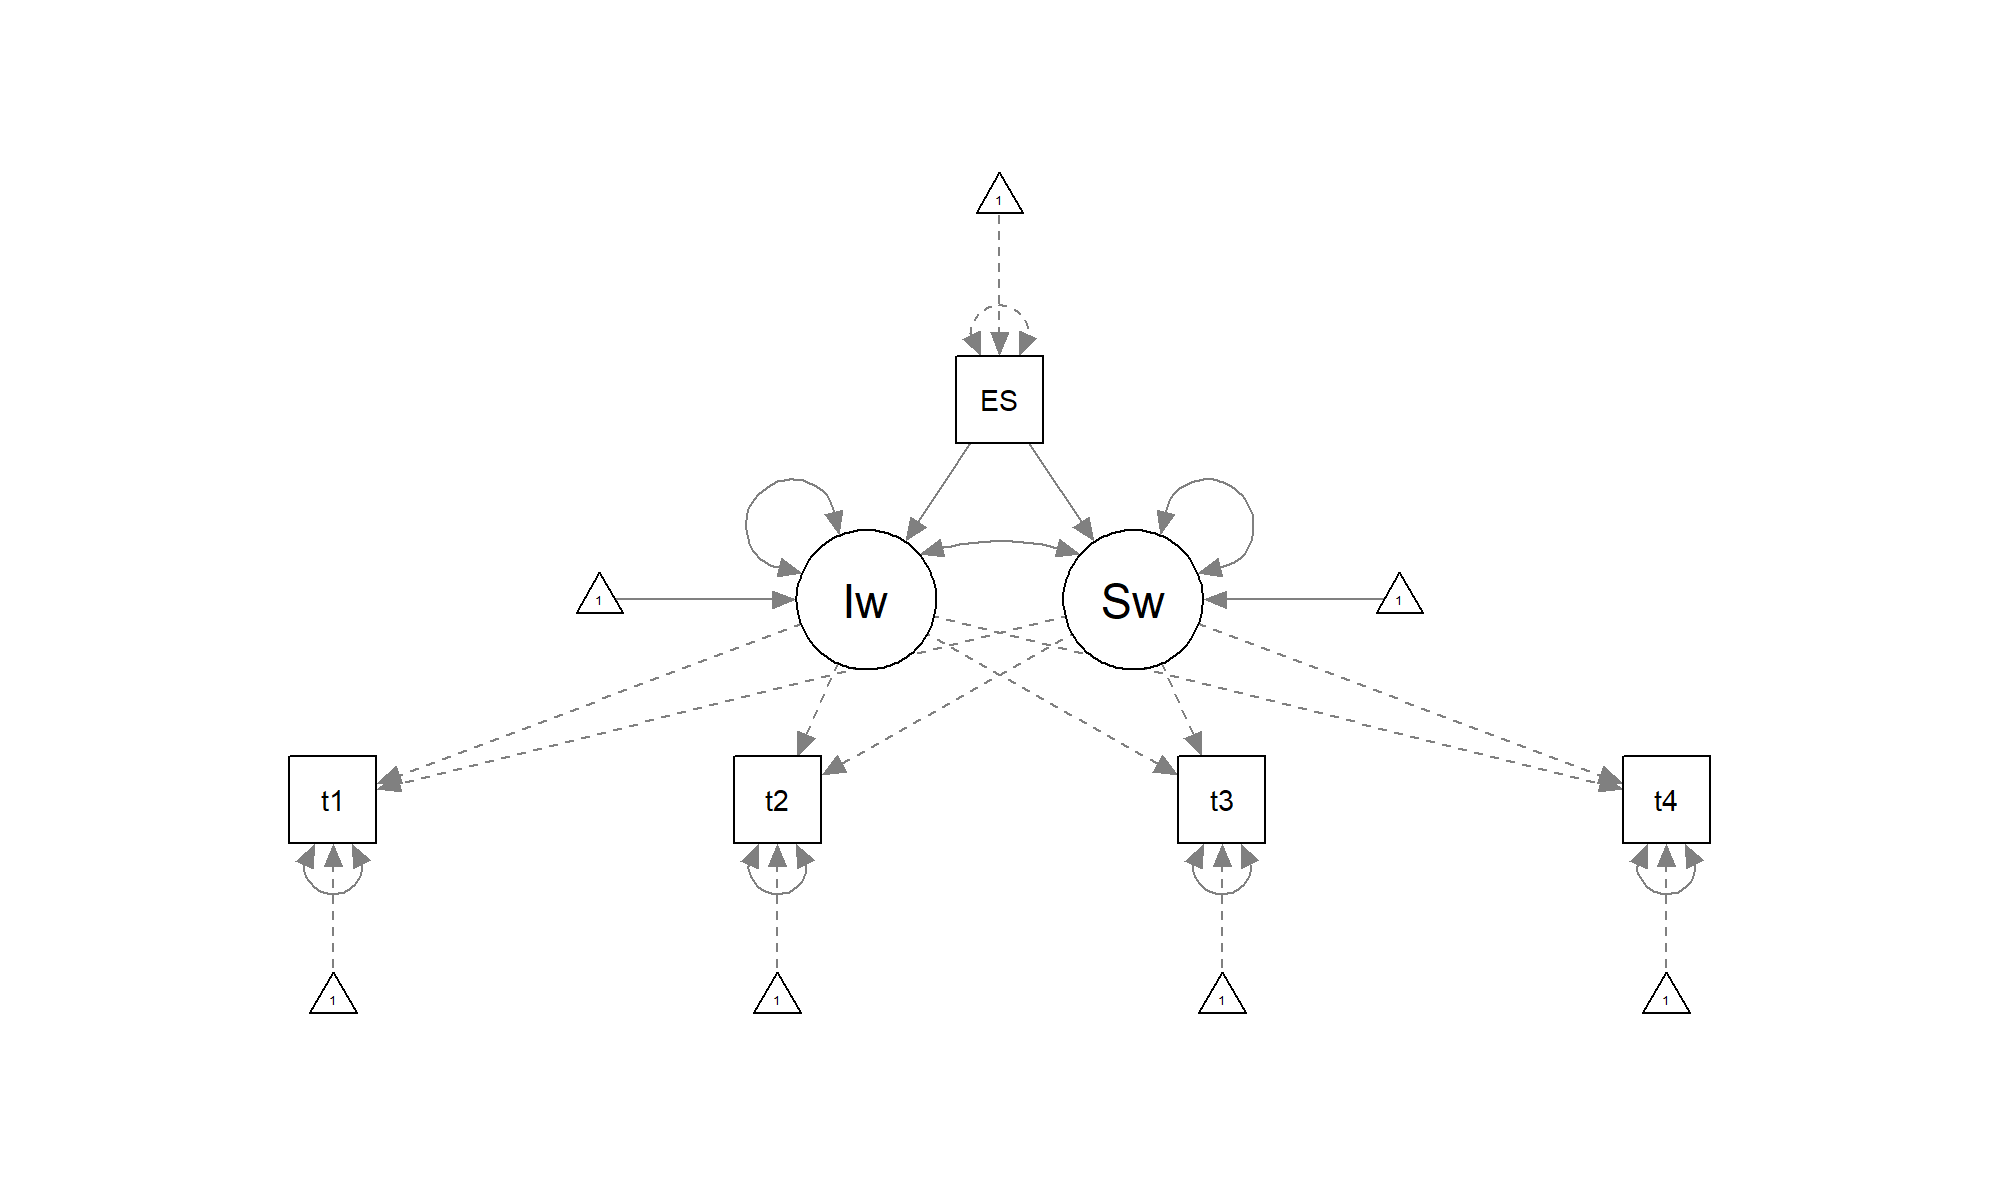

In [8]:
# Activate pandas2ri for automatic conversion
pandas2ri.activate()

# Import the lavaan package in R
ro.r('library(lavaan)')

# Import semPlot for plotting SEM paths
ro.r('library(semPlot)')

# Load the dataset into R
ro.globalenv['anx'] = pandas2ri.py2rpy(anx)

# Define the SEM model
ro.r('''
GCM4 <- '

#Intercept factor loadings are fixed to 1
Iw =~ 1*t1 + 1*t2 + 1*t3 + 1*t4

#Slope factor loadings are increasingly fixed
Sw =~ 0*t1 + 1*t2 + 2*t3 + 3*t4
     
# Structural Model: ES predicting the growth factors
# ES predicts the intercept factor (initial level of anxiety)
Iw ~ ES
     
# ES predicts the slope factor (rate of change in anxiety)
Sw ~ ES
'
     
''')

# Fit the SEM model
ro.r('fit7 <- growth(GCM4, data=anx)')

# Display the summary of the SEM model
summary = ro.r('summary(fit7, fit.measures=TRUE, standardized=TRUE)')
print(summary)

# Save the SEM path diagram as a PNG file
ro.r('''
png("../LSCM_and_GCM/Datasets/semPath5.png", width = 2000, height = 1200, res = 150)
semPaths(fit7)
dev.off()
''')

# Display the saved SEM path diagram in Jupyter Notebook
display(Image(filename="../LSCM_and_GCM/Datasets/semPath5.png"))